<a href="https://colab.research.google.com/github/pharringtonp19/presidential-policies/blob/main/notebooks/Reagan/ReaganTradeDeficit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import datetime as dt
from google.colab import userdata
from matplotlib import font_manager
import matplotlib.dates as mdates
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import rcParams
rcParams['image.interpolation'] = 'nearest'
rcParams['image.cmap'] = 'viridis'
rcParams['axes.grid'] = False
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [6]:
start, end = dt.datetime(1950, 1, 1), dt.datetime(1990, 12, 31)

# Net exports (can be negative = deficit)
netexp = web.DataReader("NETEXP", "fred", start, end)

# Nominal GDP
gdp = web.DataReader("GDP", "fred", start, end)

# Trade balance as % of GDP
trade_gdp = (netexp["NETEXP"] / gdp["GDP"]) * 100
trade_gdp.head()

,0
DATE,
1950-01-01,0.784466
1950-04-01,0.565804
1950-07-01,-0.240140
1950-10-01,-0.048133
1951-01-01,0.052679


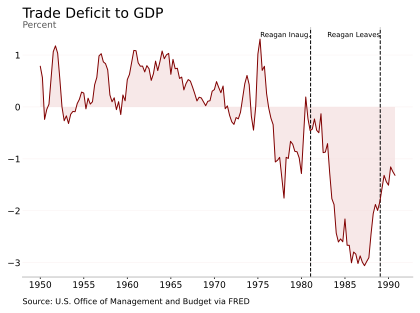

In [10]:
x, y = trade_gdp.index, trade_gdp.values

# --- NYT-style colors ---
line_color     = "#800000"  # maroon (main line)
fill_color     = "#f2d9d9"  # light rose fill
forecast_fill  = "#cc9999"  # medium maroon/rose for forecast shading
grid_color     = "#f9f0f0"  # very light pinkish-gray for grid

fig, ax = plt.subplots(figsize=(7, 4.5), dpi=300)
ax.set_facecolor("white")
fig.patch.set_facecolor("white")

# area + line
ax.fill_between(x, 0, y, color=fill_color, linewidth=0, zorder=1, alpha=0.6)
ax.yaxis.grid(True, color=grid_color, linewidth=.5, zorder=2)
ax.plot(x, y, color=line_color, linewidth=1, zorder=3,
        solid_capstyle="round", solid_joinstyle="round")

# spines & ticks (keep only a subtle bottom spine)
for side in ("top", "left", "right"):
    ax.spines[side].set_visible(False)
ax.spines["bottom"].set_color("#bdbdbd")
ax.spines["bottom"].set_linewidth(1)

ax.tick_params(axis="x", length=2, labelsize=9, pad=2)
ax.tick_params(axis="y", length=0, labelsize=9, pad=2)

# tidy limits
ax.set_axisbelow(True)            # any future gridlines stay behind

# title + subtitle (left-aligned)
ax.text(0., 1.04, s='Trade Deficit to GDP', transform=ax.transAxes, size=14)
ax.text(0, 1.00, "Percent", transform=ax.transAxes,
        fontsize=9, color="#555555")

ax.annotate("Source: U.S. Office of Management and Budget via FRED",
        xy = (0., -0.1),
        xycoords='axes fraction',
        ha='left',
        va="center",
        fontsize=8)

# Reagan's presidency
reagan_start = dt.datetime(1981, 1, 20)
reagan_end   = dt.datetime(1989, 1, 20)

# Vertical lines
ax.axvline(reagan_start, color="black", linestyle="--", linewidth=1)
ax.text(reagan_start, ax.get_ylim()[1]*0.95, "Reagan Inaug.", rotation=0,
        va="top", ha="right", fontsize=7, color="black")

ax.axvline(reagan_end, color="black", linestyle="--", linewidth=1)
ax.text(reagan_end, ax.get_ylim()[1]*0.95, "Reagan Leaves", rotation=0,
        va="top", ha="right", fontsize=7, color="black")

fig.savefig("reagan_trade_deficit.png", bbox_inches="tight", dpi=300)
plt.show()